In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\shree\Downloads\MSFT (20240314000000000 _ 20230314000000000).csv')
prices = data['Close']

In [3]:
#daily returns as percentage
returns = prices.pct_change().dropna()

In [4]:
# Estimate mu (drift) and sigma (volatility) on an annualized basis
mu_estimate = returns.mean() * 253
sigma_estimate = returns.std() * np.sqrt(253)

In [5]:
print(f"Estimated annual drift (mu): {mu_estimate}")
print(f"Estimated annual volatility (sigma): {sigma_estimate}")

Estimated annual drift (mu): 0.5144950844566278
Estimated annual volatility (sigma): 0.22742120295734897


In [6]:
# Calculate mean and standard deviation of returns
mean_returns = returns.mean()
std_returns = returns.std()

In [7]:
# Set a threshold for identifying jumps
threshold = 2 * std_returns

In [8]:
# Identify jumps
upward_jumps = returns[returns > mean_returns + threshold]
downward_jumps = returns[returns < mean_returns - threshold]

In [9]:
# Combine upward and downward jumps
jumps = pd.concat([upward_jumps, downward_jumps])

print("Identified jumps (by date):")
print(jumps)
mean_j=jumps.mean() #mean of the jumps
sigma_j=jumps.std() #standard deviation of the jumps
lambda_j=len(jumps) # number of jumps per year
print(mean_j)

Identified jumps (by date):
2      0.040536
30     0.072435
31     0.032028
51     0.038458
65     0.031897
86     0.039800
156    0.030678
59    -0.030868
92    -0.037637
157   -0.037514
222   -0.026946
245   -0.029572
Name: Close, dtype: float64
0.010274438222163626


In [10]:
#forecasting with monte carlo
import matplotlib.pyplot as plt
S0 = prices[252]  # Starting asset price
T = 1  # Time horizon in years
dt = 1/253  # Daily time step
N = int(T / dt)  # Number of time steps

In [11]:
# Simulate one possible future path
path = [S0]
for _ in range(1, N):
    Z = np.random.standard_normal()  # Random shock from standard normal distribution
    J=np.random.poisson(lambda_j *dt) # expected number of jumps
    if J>0:
        sizes = np.random.normal(mean_j, sigma_j, J).sum()  # Total jump size
    else:
        sizes=0
    S_t = path[-1] * np.exp((mu_estimate - 0.5 * sigma_estimate**2) * dt + sigma_estimate * np.sqrt(dt) * Z+sizes)
    path.append(S_t)

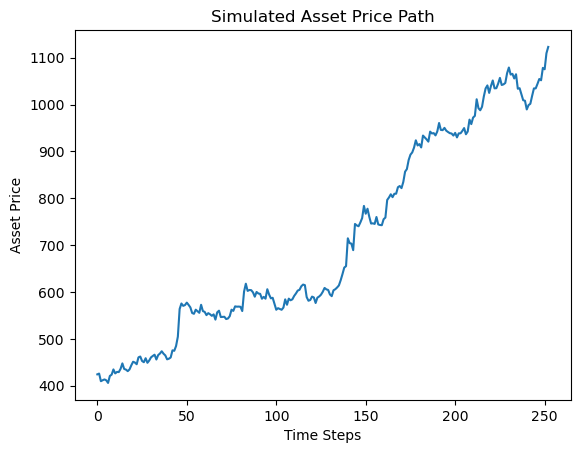

In [12]:
# Plot the simulated asset price path
plt.plot(path)
plt.title('Simulated Asset Price Path')
plt.xlabel('Time Steps')
plt.ylabel('Asset Price')
plt.show()